In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("https://gitlab.com/dariamikl/nti/raw/master/datasets/titanic/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# ПКласс - категориальныый признак

In [3]:
df['Pclass'] = df['Pclass'].astype(str)

In [4]:
df.shape

(891, 12)

In [5]:
df[df.isnull().any(axis=1)].shape

(708, 12)

# Как видим - данные очень плохи: много пропусков, а так же не настроены категориальные признаки

Давайте сначала определимся, что есть категориальный признак, а что - нет

    Survived - мы вообще будем использовать как ответ
    Pclass - однозначно категориальный признак, поэтому мы записали его как str ранее
    Name - на первый взгляд просто имя, но в нем есть и звание, что мы и будем использовать
    Sex - однозначно категориальный признак, уже в str
    Age - не совсем однозначно, но все-такие категориальный признак. Из-за обилия уникальных згначний будем записывать возраст в 
    конкретные категории
    SibSp - кол-во супругов. Возможно семья имела бы больше шансев (но мы этого пока не знаем) - это не категориальный признак, оствим 
    как есть
    Parch - кол-во детей - та же история
    Ticket - билет. В принципе - мусор на первый взгляд, но мы еще посмотрим
    Fare - тариф больше->богаче пассажир
    Cabin - каюта. Признак крайне важный, если бы мы знали расположение на корабле. Но как оказалось - много данных из этой колонки и 
    вовсе пустые, так что однозначно - в топку
    Embarked - куда направлялись. C = Cherbourg, Q = Queenstown, S = Southampton Оставим как категориальный, нормально
    

# Вытащим звание из имен

In [6]:
df['Name'].dtypes # объект

dtype('O')

In [7]:
title = df.Name.values
import re
for i in range(len(title)):
    r = re.search(', ([A-Za-z ]*)',title[i])
    title[i] = r.group(1)
df.loc[:,'Name'] = title 

Вуаля

In [8]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Mr,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Mrs,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Mrs,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Mr,male,35.0,0,0,373450,8.0500,NaN,S


Идем далее - возраст.
у нас там есть NaN - нужно заполнить

In [9]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
cut_points = np.arange(0,85,5)
label_names = cut_points[1:18]
df['Age'] = pd.cut(df['Age'],cut_points,labels=label_names)

In [10]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Mr,male,25,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Mrs,female,40,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Miss,female,30,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Mrs,female,35,1,0,113803,53.1000,C123,S
4,5,0,3,Mr,male,35,0,0,373450,8.0500,NaN,S


# Готово!

# А цельные ли у нас данные (спойлер - нет)

In [11]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,Miss,female,40,0,0,113572,80.0,B28,NaN
829,830,1,1,Mrs,female,65,0,0,113572,80.0,B28,NaN


In [12]:
df[df['Cabin'].isnull()].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Mr,male,25,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,Miss,female,30,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,Mr,male,35,0,0,373450,8.0500,NaN,S
5,6,0,3,Mr,male,30,0,0,330877,8.4583,NaN,Q
7,8,0,3,Master,male,5,3,1,349909,21.0750,NaN,S


Embarked  мы можем поставить от балды - не так важно, да и всего 2 записи

In [13]:
df['Embarked'][61] = df['Embarked'][30]
df['Embarked'][829] = df['Embarked'][314]

In [14]:
print('с заполненой каютой {}'.format(df[~df['Cabin'].isnull()].shape)) # заполненые
print('без каюты {}'.format(df[df['Cabin'].isnull()].shape)) # не заполненые

с заполненой каютой (204, 12)
без каюты (687, 12)


Как видим не заполненых данных намного больше - деваться не куда - в топку

In [15]:
df = df.drop(['Cabin'], axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,Mr,male,25,1,0,A/5 21171,7.2500,S
1,2,1,1,Mrs,female,40,1,0,PC 17599,71.2833,C
2,3,1,3,Miss,female,30,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,Mrs,female,35,1,0,113803,53.1000,S
4,5,0,3,Mr,male,35,0,0,373450,8.0500,S


# Разобраться осталось только с билетом

In [16]:
df['Ticket'].unique()[:20] # это только первые 20

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649'], dtype=object)

# Вообщем - много их, тоже в топку

In [17]:
df = df.drop(['Ticket'], axis=1)

Проверим, нет ли NaN, на всякий случай

In [18]:
df[df.isnull().any(axis=1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked


Данные готовы

#### ПОРА ИХ ЮЗАНУТЬ!

In [19]:
df_done = pd.get_dummies(df)
df_done.head(2)

,PassengerId,Survived,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Name_Capt,Name_Col,...,Age_50,Age_55,Age_60,Age_65,Age_70,Age_75,Age_80,Embarked_C,Embarked_Q,Embarked_S
0,1,0,1,0,7.2500,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,1,0,71.2833,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [20]:
x = np.array(df_done.iloc[:,2:])

In [21]:
y = np.array(df_done.iloc[:,1:2])

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)

In [23]:
print(X_train.shape)
print(y_train.shape)

(712, 44)
(712, 1)


In [24]:
print(X_test.shape)
print(y_test.shape)

(179, 44)
(179, 1)


## ОГО - ПОСТИРОНИЯ!
<img src="https://memepedia.ru/wp-content/uploads/2018/09/postironichnye-memy.png">
## Признаков аж 44 - как тебе такое, Илон?

# Ну, поехали!

Так как мы новички - пойдем перебором всех варинтов

Для начала - есть два способа препроцессинга данных - минМакс и стандартизация - обе штуки из статистики, так что не будем вдаваться
### Ну и третий - не делать ничего)

In [25]:
from sklearn.preprocessing import MinMaxScaler
sc_x = MinMaxScaler((-1,1))
X_train_mm  = sc_x.fit_transform(X_train)
X_test_mm = sc_x.transform(X_test)

In [26]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_ss = sc.fit_transform(X_train)
X_test_ss = sc.transform(X_test)

# Первой в ход - LogisticRegression

In [67]:
from sklearn.linear_model import LogisticRegression
logReg_mm = LogisticRegression()
logReg_ss = LogisticRegression()
logReg = LogisticRegression()
logReg_mm.fit(X_train_mm, y_train)
logReg_ss.fit(X_train_ss, y_train)
logReg.fit(X_train,y_train)
VLogReg = list(range(3))
VLogReg[0] = logReg_mm.score(X_test_mm,y_test)
VLogReg[1] = logReg_ss.score(X_test_ss,y_test)
VLogReg[2] = logReg.score(X_test,y_test)

In [68]:
from sklearn.svm import SVC

SVC_model_mm = SVC()
SVC_model_ss = SVC()
SVC_model = SVC()
SVC_model_mm.fit(X_train_mm, y_train)
SVC_model_ss.fit(X_train_ss, y_train)
SVC_model.fit(X_train,y_train)
VSVC_model = list(range(3))
VSVC_model[0] = SVC_model_mm.score(X_test_mm,y_test)
VSVC_model[1] = SVC_model_ss.score(X_test_ss,y_test)
VSVC_model[2] = SVC_model.score(X_test,y_test)

In [69]:
from sklearn.ensemble import RandomForestClassifier
forest_model_mm = RandomForestClassifier()
forest_model_ss = RandomForestClassifier()
forest_model = RandomForestClassifier()
forest_model_mm.fit(X_train_mm, y_train)
forest_model_ss.fit(X_train_ss, y_train)
forest_model.fit(X_train,y_train)
Vforest_model = list(range(3))
Vforest_model[0] = SVC_model_mm.score(X_test_mm,y_test)
Vforest_model[1] = SVC_model_ss.score(X_test_ss,y_test)
Vforest_model[2] = SVC_model.score(X_test,y_test)

/Users/dinoz4vrick/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
/Users/dinoz4vrick/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/Users/dinoz4vrick/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


In [70]:
from sklearn.tree import DecisionTreeClassifier
tree_model_mm = RandomForestClassifier()
tree_model_ss = RandomForestClassifier()
tree_model = RandomForestClassifier()
tree_model_mm.fit(X_train_mm, y_train)
tree_model_ss.fit(X_train_ss, y_train)
tree_model.fit(X_train,y_train)
Vtree_model = list(range(3))
Vtree_model[0] = tree_model_mm.score(X_test_mm,y_test)
Vtree_model[1] = tree_model_ss.score(X_test_ss,y_test)
Vtree_model[2] = tree_model.score(X_test,y_test)

/Users/dinoz4vrick/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
/Users/dinoz4vrick/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/Users/dinoz4vrick/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


In [71]:
from sklearn.neighbors import KNeighborsClassifier
knn_model_mm = RandomForestClassifier()
knn_model_ss = RandomForestClassifier()
knn_model = RandomForestClassifier()
knn_model_mm.fit(X_train_mm, y_train)
knn_model_ss.fit(X_train_ss, y_train)
knn_model.fit(X_train,y_train)
Vknn_model = list(range(3))
Vknn_model[0] = knn_model_mm.score(X_test_mm,y_test)
Vknn_model[1] = knn_model_ss.score(X_test_ss,y_test)
Vknn_model[2] = knn_model.score(X_test,y_test)

/Users/dinoz4vrick/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
/Users/dinoz4vrick/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/Users/dinoz4vrick/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


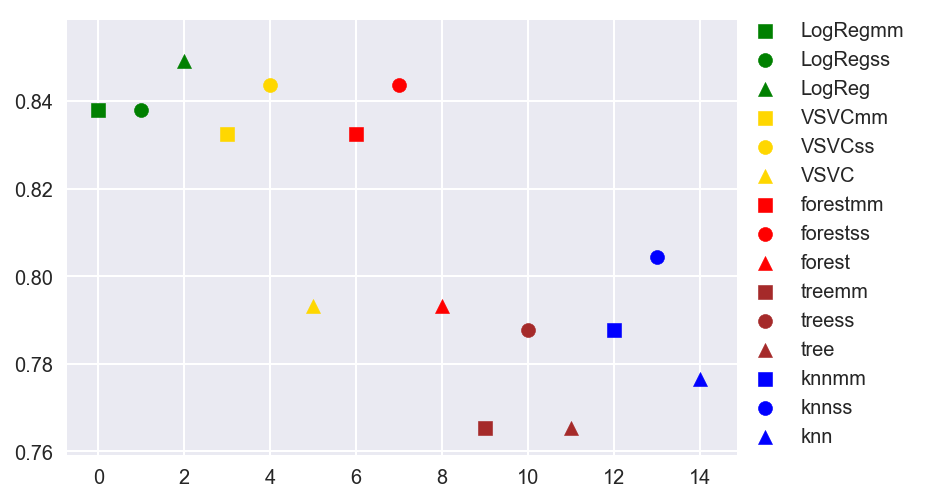

In [72]:
import seaborn as sns
sns.set()
x = np.arange(0,15)
plt.scatter(x[0],VLogReg[0], c ='g',label='LogRegmm',marker='s')
plt.scatter(x[1],VLogReg[1], c ='g',label='LogRegss')
plt.scatter(x[2],VLogReg[2], c ='g',label='LogReg',marker='^')
plt.scatter(x[3],VSVC_model[0], c ='gold',label='VSVCmm',marker='s')
plt.scatter(x[4],VSVC_model[1], c ='gold',label='VSVCss')
plt.scatter(x[5],VSVC_model[2], c ='gold',label='VSVC',marker='^')
plt.scatter(x[6],Vforest_model[0], c ='r',label='forestmm',marker='s')
plt.scatter(x[7],Vforest_model[1], c = 'r',label='forestss')
plt.scatter(x[8],Vforest_model[2], c = 'r',label='forest',marker='^')
plt.scatter(x[9],Vtree_model[0], c ='brown',label='treemm',marker='s')
plt.scatter(x[10],Vtree_model[1], c ='brown',label='treess')
plt.scatter(x[11],Vtree_model[2], c ='brown',label='tree',marker='^')
plt.scatter(x[12],Vknn_model[0], c='b',label='knnmm',marker='s')
plt.scatter(x[13],Vknn_model[1], c ='b',label = 'knnss')
plt.scatter(x[14],Vknn_model[2], c = 'b', label = 'knn',marker='^')
plt.legend(loc = [1,0])

# ИТОГИ:
    Нам удалось достичь правильности 85% совсем не настраивая модели
    Научились препроцессингу data
    ???
    profit